In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# prepare data

In [40]:
data = pd.read_csv('../data_sets/SOCR-HeightWeight.csv',usecols=[1,2])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [3]:
data.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


<Axes: xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

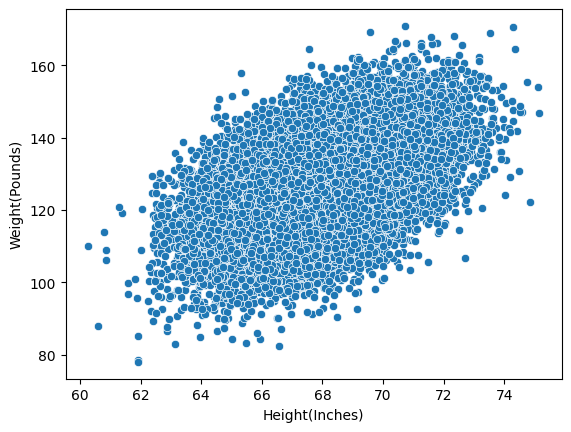

In [4]:
sns.scatterplot(data=data,x='Height(Inches)',y='Weight(Pounds)')

# prepare X and y

In [5]:
X = data['Height(Inches)']
y = data['Weight(Pounds)']

# Import SKlearn Regression Module

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.22,shuffle=True,random_state=33)

X_train = X_train.to_frame()
X_test = X_test.to_frame()

# Regression Modules
LinearRegression_Model = LinearRegression(n_jobs=-1)

In [7]:
LinearRegression_Model.fit(X_train,Y_train)
y_pred = LinearRegression_Model.predict(X_test)

# intercept  , coef
intercept = LinearRegression_Model.intercept_
coef = LinearRegression_Model.coef_[0]

MAE = mean_absolute_error(Y_test,y_pred)
print("="*50)
print(f"Model = {str(LinearRegression_Model)}")
print(f"weight = {intercept} + {coef} * hight")
print("MAE = " ,mean_absolute_error(Y_test,y_pred))
print("RMSE = " ,root_mean_squared_error(Y_test,y_pred))
print("MSE = " , mean_squared_error(Y_test,y_pred))
print("="*50)

Model = LinearRegression(n_jobs=-1)
weight = -82.43304118766764 + 3.0817470871796795 * hight
MAE =  8.049721576038474
RMSE =  10.132675411450808
MSE =  102.67111099381982


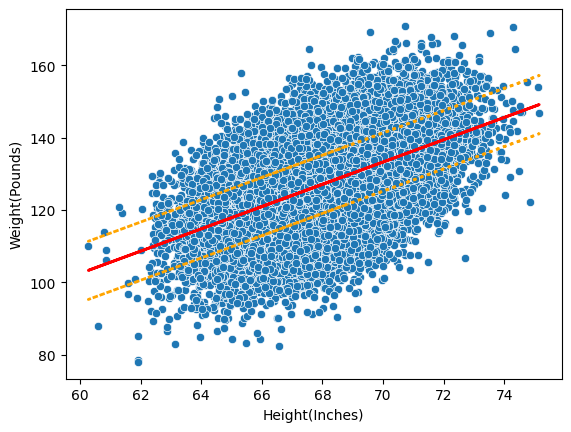

In [8]:
best_fit_line = intercept + coef * data["Height(Inches)"]
h_w_scatetrplot = sns.scatterplot(data=data,x='Height(Inches)',y='Weight(Pounds)')

plt.plot(data['Height(Inches)'],best_fit_line, linewidth=2,color="red")
plt.plot(data['Height(Inches)'],best_fit_line+MAE, linewidth=2,color="orange",linestyle=':')
plt.plot(data['Height(Inches)'],best_fit_line-MAE, linewidth=2,color="orange",linestyle=':')


In [36]:

# Create DataFrame
df = pd.DataFrame({'Height(Inches)':[68.700787]})
LinearRegression_Model.predict(df)

array([129.28540904])